# Importing Data and Libraries

In [1]:
# Importing pre-installed Libraries

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy.stats import boxcox
import scipy.stats as stats

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn import metrics

In [2]:
# Importing self-build libraries
from manipulation import feature_select, box_cox_transformer, outlayer_remover
from eda import data_overview, visualization
from manipulation import preprocesing
from machine_learning import feature_target_splitter, machine_learning

In [3]:
# Getting current directory path
current_dir = os.getcwd()

In [4]:
# Importing Data
dscr = open(current_dir + '/data_description.txt')
dscr = dscr.read()
df_train = pd.read_csv(current_dir + '/dataset.csv')
df = df_train

# Data Overview

In [5]:
overview = data_overview(df, dscr)

### Looking at first and last rows of the dataframe

In [6]:
overview.head_tail()






Data Head:



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000







Data Tail:



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


### Looking at dataset documentation and feature description

In [7]:
overview.features_description()






The Description for Features:


MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Re

### Looking into the data information

In [8]:
overview.data_information()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Descriptive statistics of the columns with numeric objecs

In [9]:
overview.descriptive_statistics()

                Id   MSSubClass  LotFrontage        LotArea  OverallQual
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000
mean    730.500000    56.897260    70.049958   10516.828082     6.099315
std     421.610009    42.300571    24.284752    9981.264932     1.382997
min       1.000000    20.000000    21.000000    1300.000000     1.000000
25%     365.750000    20.000000    59.000000    7553.500000     5.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000
max    1460.000000   190.000000   313.000000  215245.000000    10.000000 

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726
std       1.112799    30.202904     20.645407   181.066207   456.098091
min       1.000000  1872.000000   1950.000000     0.0

# Data Manipulation

## Check for duplicates

In [10]:
sum(df.duplicated())

0

If this line of code returns any number rather than 0 , it means we have duplicated rows in our dataset. But as can be seen, it returns 0 which means we have no duplicated row here.


* Usually after this step, we search for structural errors such as string inconsistencies. However, regarding the documentation, we don't have these type of issues for this dataset.

## Checking for null values

In [11]:
overview.features_with_null_values()

The features containing null values : 

Feature     number of null

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


## Handling missing values

As can be seen in the documentation, there are two kinds of null values in our dataset. One kind is meaningfull, and we have to replace them with real values. On the other hand there are real null values which are truely missed during data collecting process. In this section we replace the meaninfull null values with the true values for them.

#### features mentioned in documentation

* ##### Alley
Considering data description, NA means "no alley access"

In [12]:
df["Alley"] = df["Alley"].fillna("None")

* ##### PoolQC
According to the description, NA stands for "No Pool." That makes sense, considering the enormous missing value ratio (+99%) and the fact that the majority of houses don't generally have pools.

In [13]:
df["PoolQC"] = df["PoolQC"].fillna("None")

* ##### FireplaceQu
data description says NA means "no fireplace"

In [14]:
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

* ##### Fence
Considering data description, NA means "no fence"

In [15]:
df["Fence"] = df["Fence"].fillna("None")

* ##### MiscFeature
Considering data description, NA means "no misc feature"

In [16]:
df["MiscFeature"] = df["MiscFeature"].fillna("None")

* ##### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2
For all basement-related features, NaN means that there is no basement.

In [17]:
for cname in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[cname] = df[cname].fillna('None')

* ##### GarageType, GarageFinish, GarageQual and GarageCond 
Regrarding documentation, NA for garange features means 'feature is not available'. so we replace missing data with 'None'

In [18]:
for cname in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[cname] = df[cname].fillna('None')

* ##### GarageYrBlt, GarageArea and GarageCars 
Although it is not mentioned in the documentation, we replce non with 0 (Since No garage = no cars in such garage)

In [19]:
for cname in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[cname] = df[cname].fillna(0)

In [20]:
# Check for any null value
overview.features_with_null_values()

The features containing null values : 

Feature     number of null

LotFrontage    259
MasVnrType     872
MasVnrArea       8
Electrical       1
dtype: int64


#### features not mentioned in the documentation

As can be seen, after feature engineering , almost all of the features contain no null values anymore, except four features. MasVnrType and MasVnrArea have only 8 null values. Electrical feature has only one missing value. But LotFrontage has the most missing values which is 259. For features with a few missing values, these null values have almost no effect on the feature selection process based on correlation. But for a feature like 'LotFrontage' with almost %20 missing values, the missing values might affect the feature selection process. So basically, it is better to impute these values by making some assumption before feature selection.

* ##### MasVnrArea and MasVnrType
It is not mentioned in the description file that NA means none, But it most likely means no masonry veneer for these houses. So with this assumption we can fill 0 for the area and None for the type.


In [21]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

* ##### Electrical
This feature has only one null value. In this case we can just drop this single item. However, our dataset contains limited rows. So, it is more efficient to fill this one missing value with mode.

In [22]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

* ##### LotFrontage
There is no clue in documntation to impute the LotFrontage null values. But, since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by average of its four neighbour values. To do so, we use KNNImputer which is a scikit-learn module.

In [23]:
# Imputing null values with KNNImputer
imputer = KNNImputer(n_neighbors=4)
df["LotFrontage"] = imputer.fit_transform(imputer.fit_transform(np.array(df["LotFrontage"]).reshape(-1, 1)))


In [24]:
# Check for any null value
overview.features_with_null_values()

No feature contains null value


In [25]:
all_data = df.copy()

## String to Numeric transformation

### Converting Data to Categorical

First we need to check if there is any string inconsistencies in the columns with string data type. To do so, we check for unique values of columns.

In [26]:
# Check out if there is any string inconsistencies
for cname in df.columns:
    if df[cname].dtype == 'object':
        print(f'{cname} : ', df[cname].unique(), '\n')

MSZoning :  ['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street :  ['Pave' 'Grvl'] 

Alley :  ['None' 'Grvl' 'Pave'] 

LotShape :  ['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour :  ['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities :  ['AllPub' 'NoSeWa'] 

LotConfig :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope :  ['Gtl' 'Mod' 'Sev'] 

Neighborhood :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1 :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2 :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

BldgType :  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

RoofStyle :  ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 

RoofMatl :  ['CompShg' 'WdShngl' 'Metal' 'WdSh

As can be seen, there is no string inconsistency in the columns. Also, all the values are the same as values in the documentation. The problem here is that values are string. To do Machine Learning techniques on them we need to convert them to numeric data. To do so, initially, we need to convert them to categoricals data which are a pandas data type corresponding to categorical variables in statistics. Then we need to convert them to numerics.

To accomplish the first step, we define a function which takes a dataframe as the input, and return another dataframe with the same shape and values. The only difference is that in the returned dataframe string values are converted to categorical data.

### Convert string data to categorical data


In [27]:
# Convert string data to categorical data
preprocessing = preprocesing()
df = preprocessing.string_to_categorical(df)

In [28]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


### Converting Categorical Data to Numeric

Now that non-numeric data is categorical, we need to convert them to numerics. There are different methods to accomplish it. We prefer Scikit Learn Label Encoder tool that can satisfy our need. 

It iterates through the columns. For each column, it starts to label instances of that column from zero to number of different instances in that column minus one. The problem with this approach is that the label encoder labels instances with numbers regardless of the hierarchy of instances. For example, if we have three different instance such as 'negative', 'neutral', and 'positive'it doesn't necessarily label them with 0, 1, and 2. Instead, it labels them randomly considering the order these instances are sorted in the column. This issue might affects our accuracy in machine learning process, however, it could not have that much impact on the correlation. So, we must handle it after feature selection. 

Our function (categorical_to_numeric) takes the dataframe containing categorical data, and converts it to a new dataframe consisted of all numerics. Then it returns the new data frame, also a dictionary to map the numerics to the original categories. It could be helpful in data visualization because in that case we need to represent the data with original labels to convey an insight to the consumer rather than meaningless numerics.

In [29]:
# Convert Categorical Data to Numeric
df, col_dic = preprocessing.categorical_to_numeric(df)

In [30]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,...,0,3,4,1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,1,3,3,0,...,0,3,4,1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,1,0,3,0,...,0,3,4,1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,3,4,1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,...,0,3,4,1,0,12,2008,8,4,250000


In [31]:
# Preview the 5 first item of the mapping dictionary
dict(list(col_dic.items())[0:5])

{'MSZoning': {0: 'C (all)', 1: 'FV', 2: 'RH', 3: 'RL', 4: 'RM'},
 'Street': {0: 'Grvl', 1: 'Pave'},
 'Alley': {0: 'Grvl', 1: 'None', 2: 'Pave'},
 'LotShape': {0: 'IR1', 1: 'IR2', 2: 'IR3', 3: 'Reg'},
 'LandContour': {0: 'Bnk', 1: 'HLS', 2: 'Low', 3: 'Lvl'}}

# Feature Selection

Now all our data is numeric, it is time to select the features which has the most impact on our target 'SalePrice'. There are two main methods for feature selection. Supervised and Unsupervised. As our data set is supervised and we have access to our targets, correlation method which is a supervised approach is suitable for our dataset. 

For this 

In [32]:
# Select features by highest correlation
corr_dic = feature_select(df, 'SalePrice')

In [33]:
corr_dic

{'OverallQual': 0.7909816005838053,
 'YearBuilt': 0.5228973328794968,
 'YearRemodAdd': 0.5071009671113862,
 'MasVnrArea': 0.4726144990045739,
 'ExterQual': -0.6368836943991126,
 'BsmtQual': -0.5937339191038187,
 'TotalBsmtSF': 0.6135805515591956,
 '1stFlrSF': 0.6058521846919145,
 'GrLivArea': 0.7086244776126521,
 'FullBath': 0.5606637627484456,
 'KitchenQual': -0.5891887782994207,
 'TotRmsAbvGrd': 0.5337231555820281,
 'Fireplaces': 0.46692883675152796,
 'GarageCars': 0.6404091972583522,
 'GarageArea': 0.6234314389183617,
 'SalePrice': 0.9999999999999998}

In [34]:
# Create new dataframe with selected features and target
df = df[corr_dic.keys()]

# Print the shape of new dataframe
df.shape

(1460, 16)

In [35]:
df.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,SalePrice
0,7,2003,2003,196.0,2,2,856,856,1710,2,2,8,0,2,548,208500
1,6,1976,1976,0.0,3,2,1262,1262,1262,2,3,6,1,2,460,181500
2,7,2001,2002,162.0,2,2,920,920,1786,2,2,6,1,2,608,223500
3,7,1915,1970,0.0,3,4,756,961,1717,1,2,7,1,3,642,140000
4,8,2000,2000,350.0,2,2,1145,1145,2198,2,2,9,1,3,836,250000


In [36]:
# Previewing which what is the encoding of the categories
[col_dic[i] for i in ['ExterQual', 'BsmtQual', 'KitchenQual', 'GarageFinish']]

[{0: 'Ex', 1: 'Fa', 2: 'Gd', 3: 'TA'},
 {0: 'Ex', 1: 'Fa', 2: 'Gd', 3: 'None', 4: 'TA'},
 {0: 'Ex', 1: 'Fa', 2: 'Gd', 3: 'TA'},
 {0: 'Fin', 1: 'None', 2: 'RFn', 3: 'Unf'}]

### Relabelling the categorical data

Label encoders doesn't consider the trend of categiries. They start from index zero and label the categories depending on the sort of data in dataset. It can reduce the accuacy of the modle when we do Machine Learning on the dataset. To solve this issue, we should relabel the categorical features considering their trend.

In [37]:
# Rearrange the categorical values by their real value in a ascending format

df = df.copy(deep=True)
col_dic['ExterQual'] = {0:4, 1:1, 2:3, 3:2}
df.replace({"ExterQual": col_dic['ExterQual']}, inplace=True)
col_dic['BsmtQual'] = {0:4, 1:1, 2:3, 3:0 , 4:2}
df.replace({"BsmtQual": col_dic['BsmtQual']}, inplace=True)
col_dic['KitchenQual'] = {0:4, 1:1, 2:3, 3:2}
df.replace({"KitchenQual": col_dic['KitchenQual']}, inplace=True)
col_dic['GarageFinish'] = {0:2, 1:0, 2:1, 3:0}
df.replace({"GarageFinish": col_dic['GarageFinish']}, inplace=True)

## Data Visualization

In [38]:
# Create an object of visualization class for our dataframe
plotter = visualization(df)

#### Scatter Plots

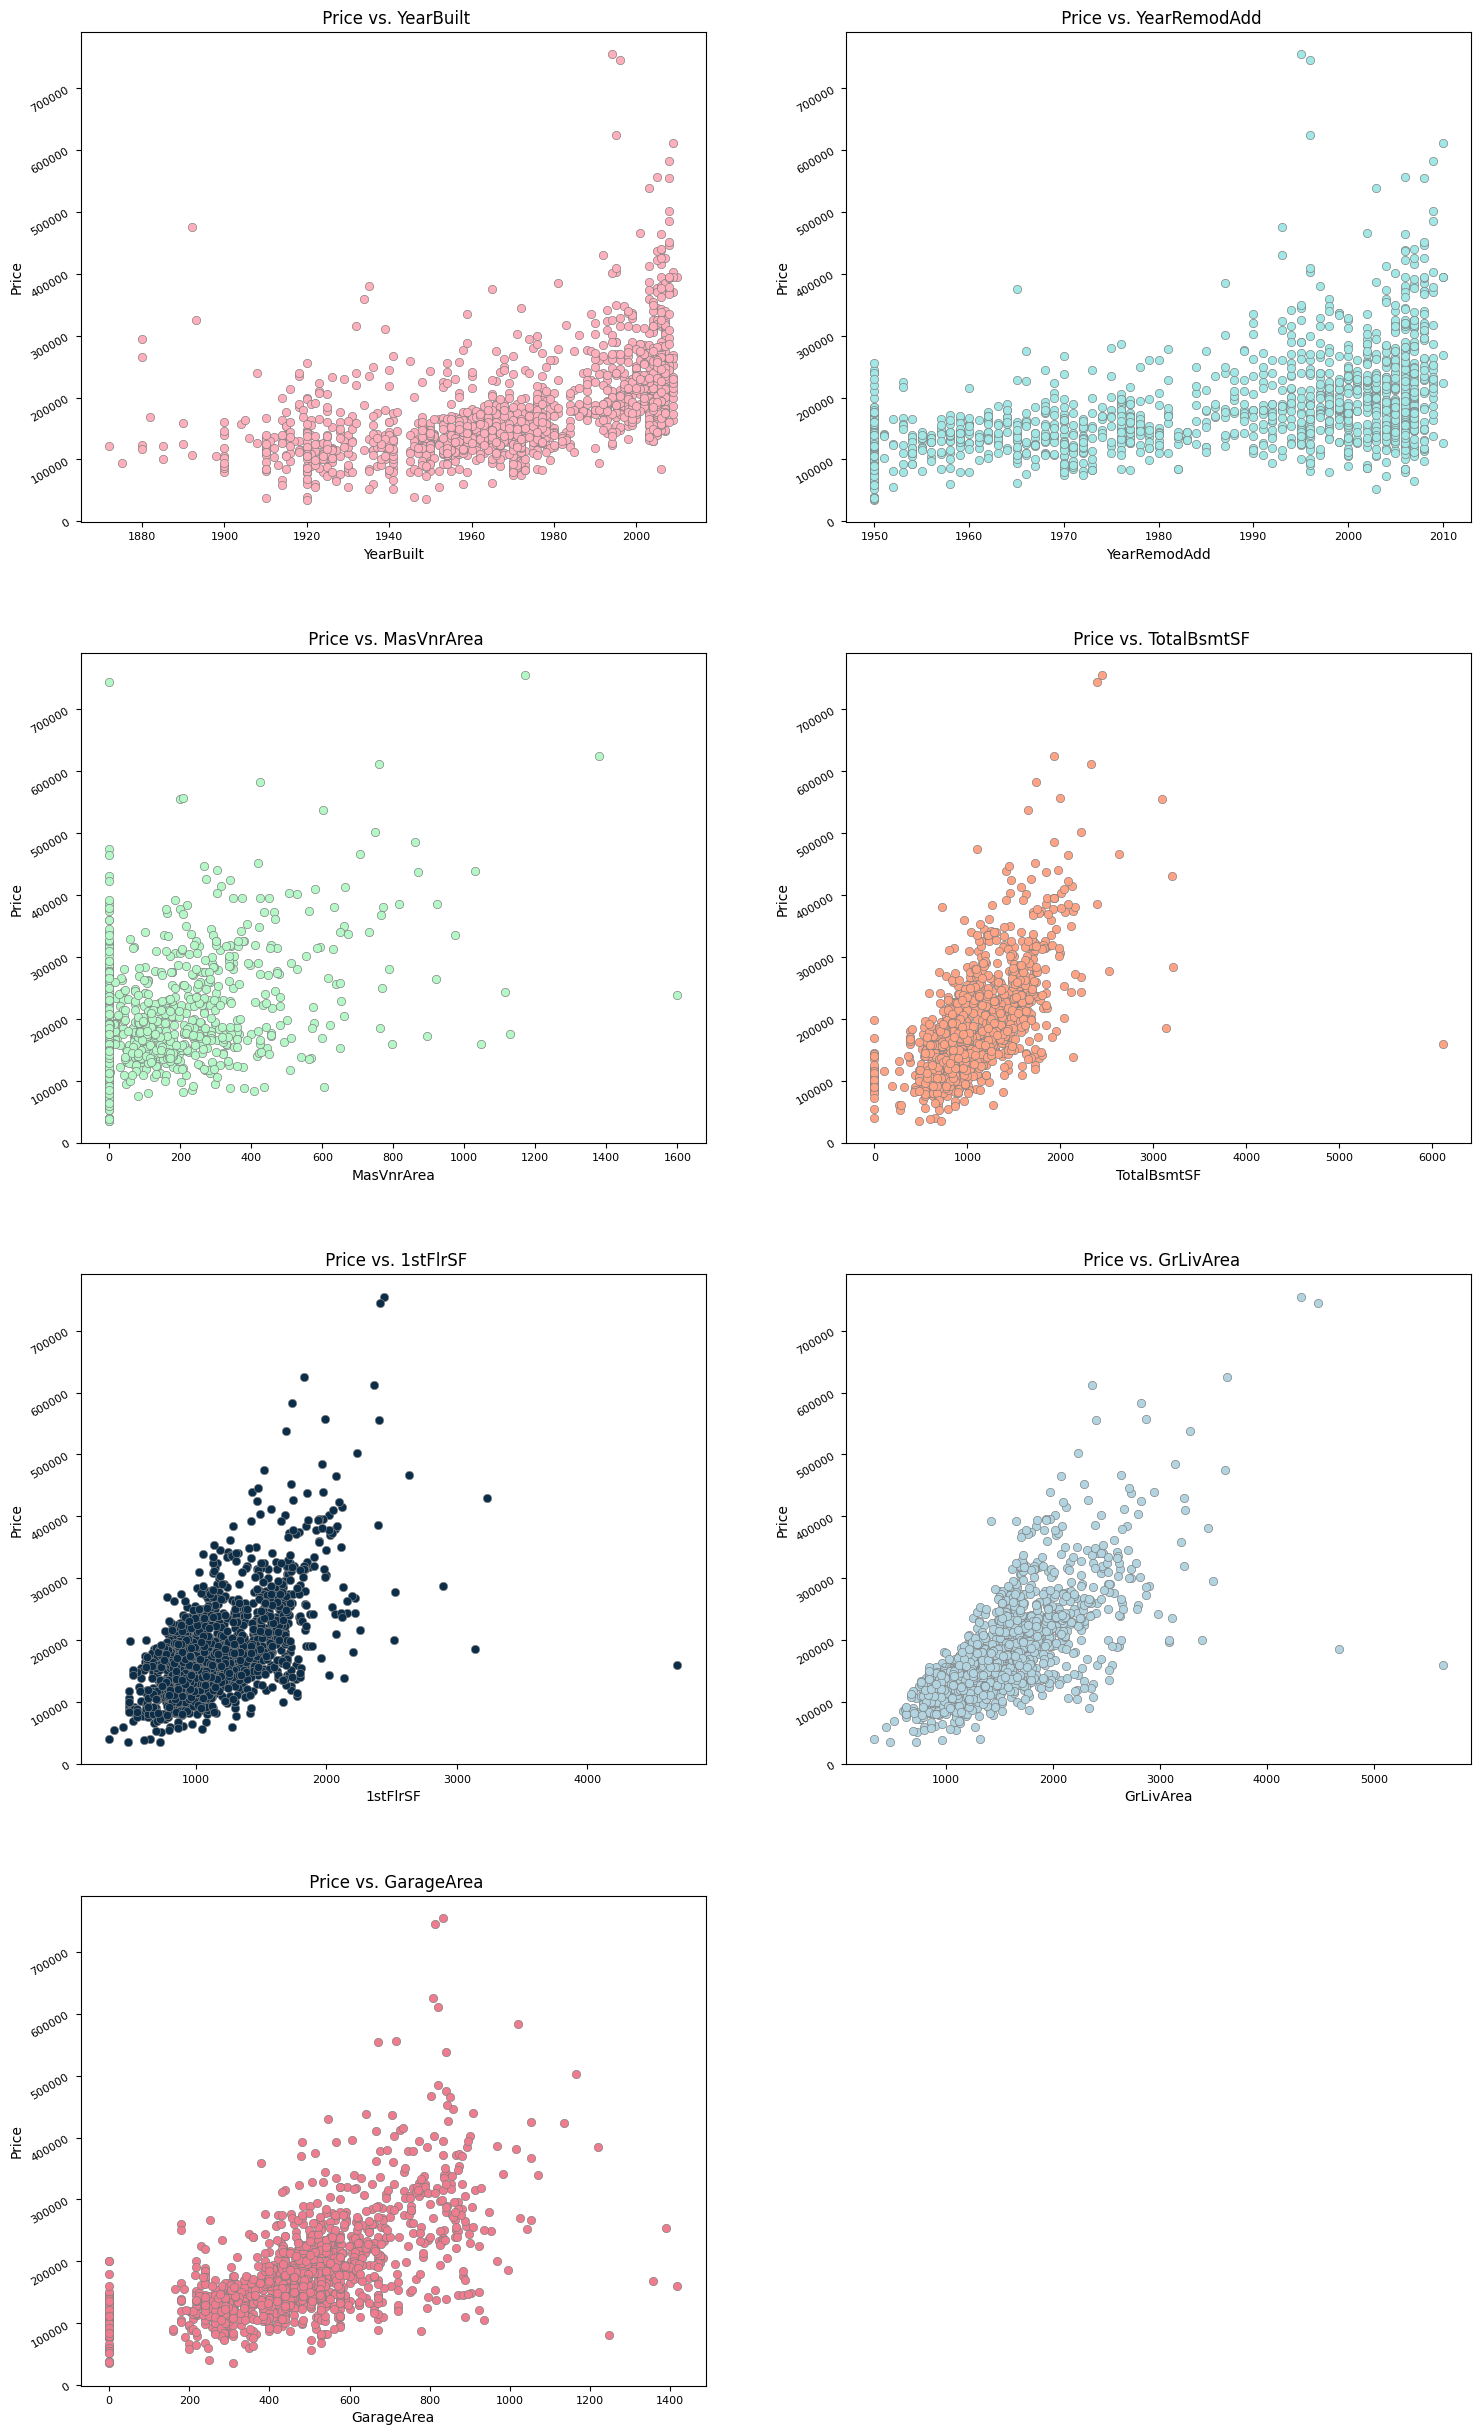

In [39]:
# Plotting the Scatter plots of price vs different features
plotter.features_price_scatter()

#### Categorical features boxplots regarding the price

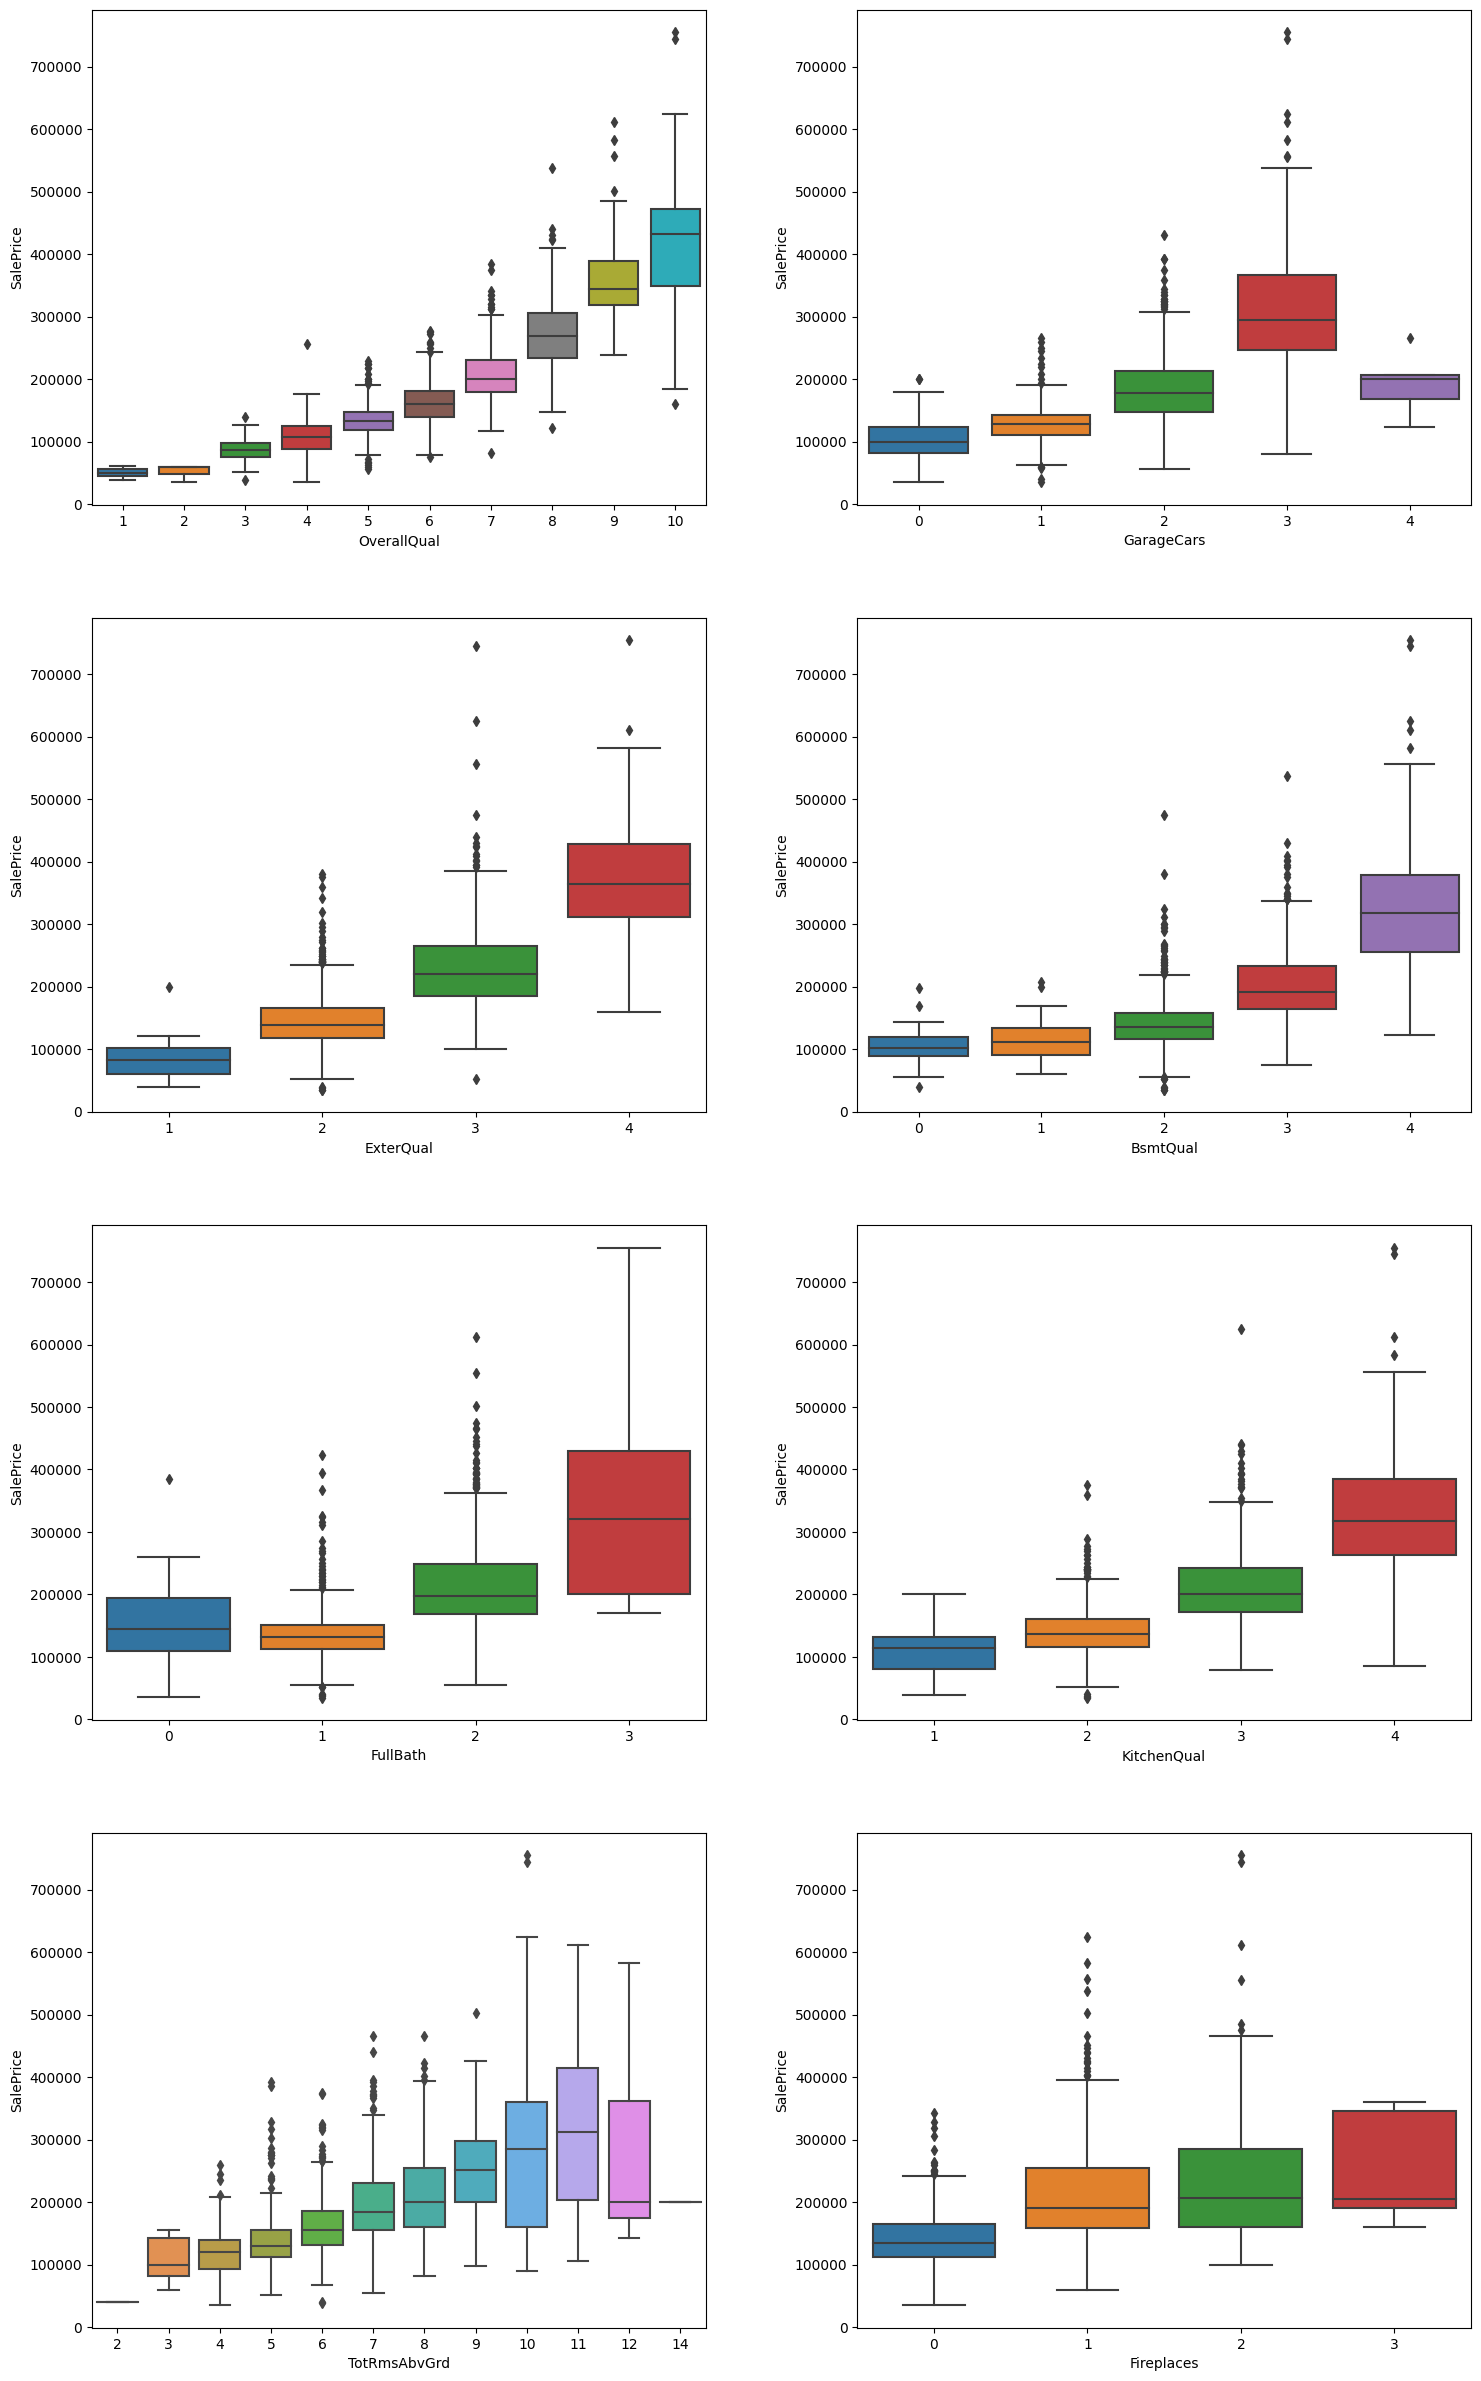

In [40]:
# Plotting independent categorical variables vs target
plotter.feature_price_boxplot()

#### Result:

Considering GarageCars feature, by increasing the number of this feature, we have an upward trend for price. However,  we can see a reduction when the number of parking spaces increases from 3 to 4. Now we have to check why this is the case. To do so, first we need to extract two dataframe from our main dataframe. The first one is consisted of the instances which have 3 parking spaces, and the second one includes the houses with 4 parkings.   

In [41]:
# Croppiing the data frame to two new dataframe
# df_parking_3 : houses with 3 parking
# df_parking_4 : houses with 4 parking
df_parking_4 = df[df['GarageCars']==4]
df_parking_3 = df[df['GarageCars']==3]

# Get the average of the feature values of cropped data frames
mean_features_4 = df_parking_4.describe().loc['mean']
mean_features_3 = df_parking_3.describe().loc['mean']

# Create a dataframe to compare the difference between the average values for each group
comparison = pd.DataFrame(index=mean_features_4.index,
                          data={'Average feature values (GarageCars == 3)':mean_features_3.values,
                                'Average feature values (GarageCars == 4)':mean_features_4.values})
comparison

,Average feature values (GarageCars == 3),Average feature values (GarageCars == 4)
OverallQual,7.950276,5.4
YearBuilt,1997.287293,1955.6
YearRemodAdd,2000.850829,1983.2
MasVnrArea,285.806630,143.4
ExterQual,3.099448,2.2
BsmtQual,3.359116,2.2
TotalBsmtSF,1546.657459,1187.8
1stFlrSF,1562.055249,1299.2
GrLivArea,2084.607735,1822.4
FullBath,2.016575,1.4


regarding the above data, houses with 3 parkings has better Overal Quality, External Quality, Basement Quality, and Kitchen Quality rather than houses with 4 parking on the average. Furthermore, overall, the former group's houses are bigger than the latter ones. Also, there is a big gap between the year they've been built. The houses with 4 parking usually had been build almost 40 years before the other group. So basically, the reason why we observe a disorder in price trend by increasing the number of parkings is has been found.

This pattern again has been observed in the 'TotRmsAbvGrd' feature. In fact, the houses which has 12 total room above the average has less prices than the ones with 11 above the average. To analyse why this is the case, we repeat the above procedure.

In [42]:
# Croppiing the data frame to two new dataframe
# df_rooms_12 : houses with 12 rooms above the average
# df_rooms_11 : houses with 11 rooms above the average
df_rooms_12 = df[df['TotRmsAbvGrd'] == 12]
df_rooms_11 = df[df['TotRmsAbvGrd'] == 11]

# Get the average of the feature values of cropped data frames
mean_features_12 = df_rooms_12.describe().loc['mean']
mean_features_11 = df_rooms_11.describe().loc['mean']

# Create a dataframe to compare the difference between the average values for each group
comparison = pd.DataFrame(index=mean_features_12.index,
                          data={'Average feature values (TotRmsAbvGrd == 11)':mean_features_11.values,
                                'Average feature values (TotRmsAbvGrd == 12)':mean_features_12.values})
comparison

,Average feature values (TotRmsAbvGrd == 11),Average feature values (TotRmsAbvGrd == 12)
OverallQual,7.555556,6.909091
YearBuilt,1972.333333,1967.272727
YearRemodAdd,1995.944444,1985.454545
MasVnrArea,298.555556,248.818182
ExterQual,2.944444,2.636364
BsmtQual,3.166667,2.454545
TotalBsmtSF,1365.333333,1648.090909
1stFlrSF,1628.111111,1752.090909
GrLivArea,2812.000000,3097.363636
FullBath,2.444444,2.363636


Comparing the columns of the table above, although the houses with one extra room are bigger than the other group on average, their quality in diferrent indexes are inferior to the other houses. Also, these group are usually older than the other buildings. So , the impact of quality and year they are built outweight the size.

#### Box-Plot for each feature

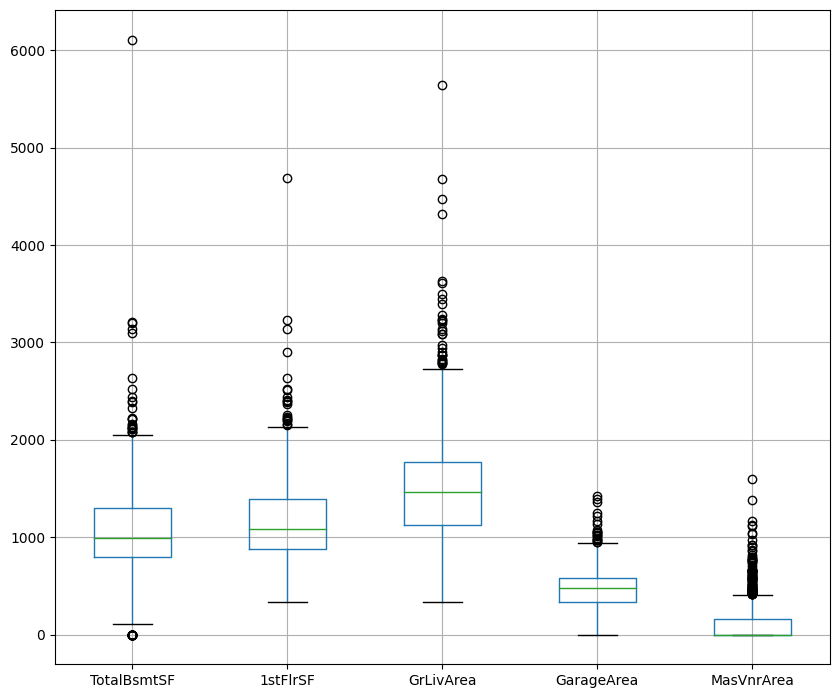

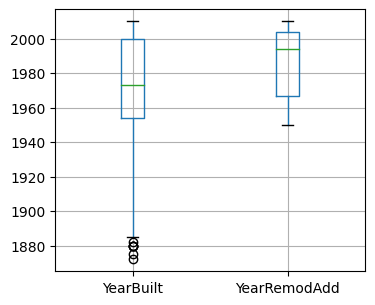

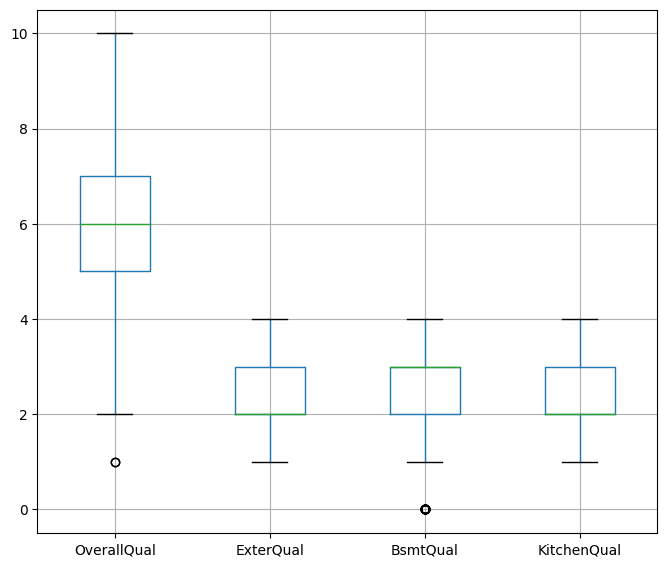

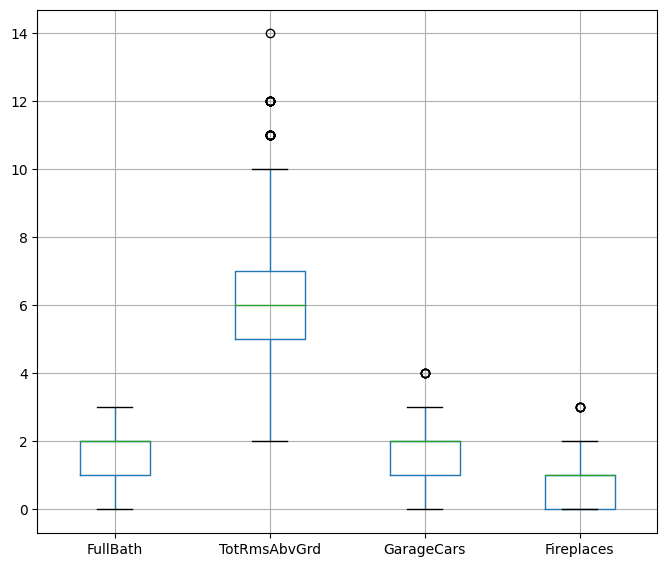

In [43]:
# Plotting the box plot for all the features to understand their distributions
plotter.features_boxplots()

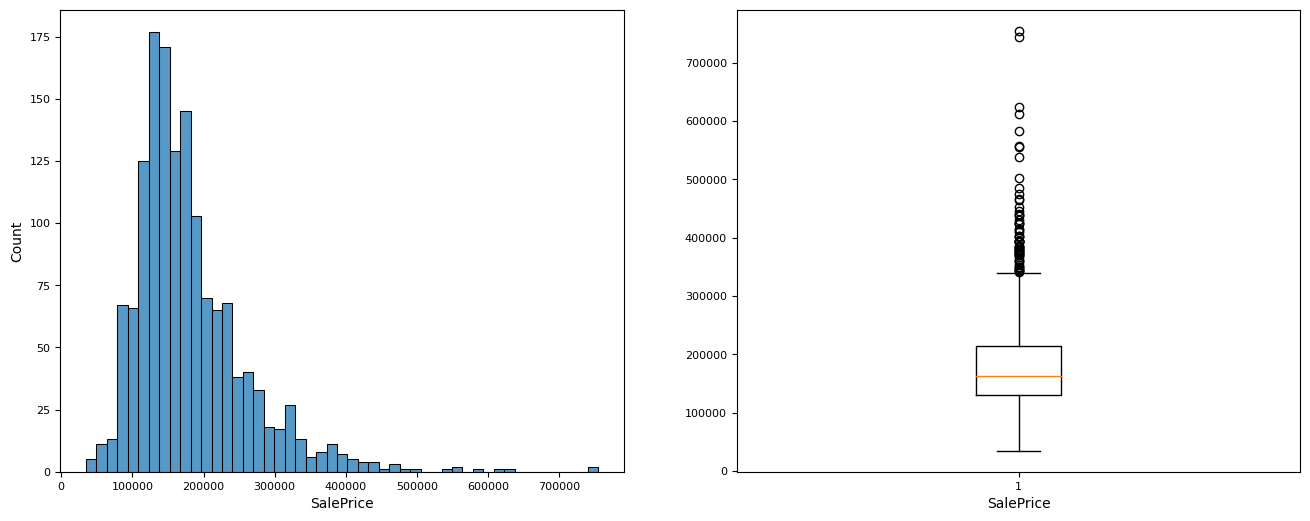

In [44]:
# plotting the price's boxplot and historam

plotter.price_distribution()

## Checking for the Outliers

#### Hypothesis:
Considering the SalePrice distribution above, it can be there are some suspecious instances which can be categorized them as outliers. But the chance of being ourlayer for two of them is very high. They might be fancy houses with enourmes prices. However, to considering an instance as an outlayer, and removing it from the database, we need solid reasons. So, it could be a better approach to create another dataframe with removed potencial outlayers. Then, we do ML on the the original and modified dataframes. Finally, if we see any improvemet iin the accuracy of our modified model, it can be undrestood that the removed instances were outlayers, otherwise they were not.

#### Method : Z-scores
Usually for detecting the outlayers, we calculate Z-score that which is the deviation of an instance devided by standard deviation of the data for all instances, then those instances with z-score above 3 standard deviation or below -3 standard deviation will be dropped from the dataset.

In [45]:
# Remove the outlayers and print out the number of outlayers
df_without_outlayers = outlayer_remover(df)

22 Houses are detected as outlayers


#### Showing the distributions after and before removing outlayers:

The old Price distribution:


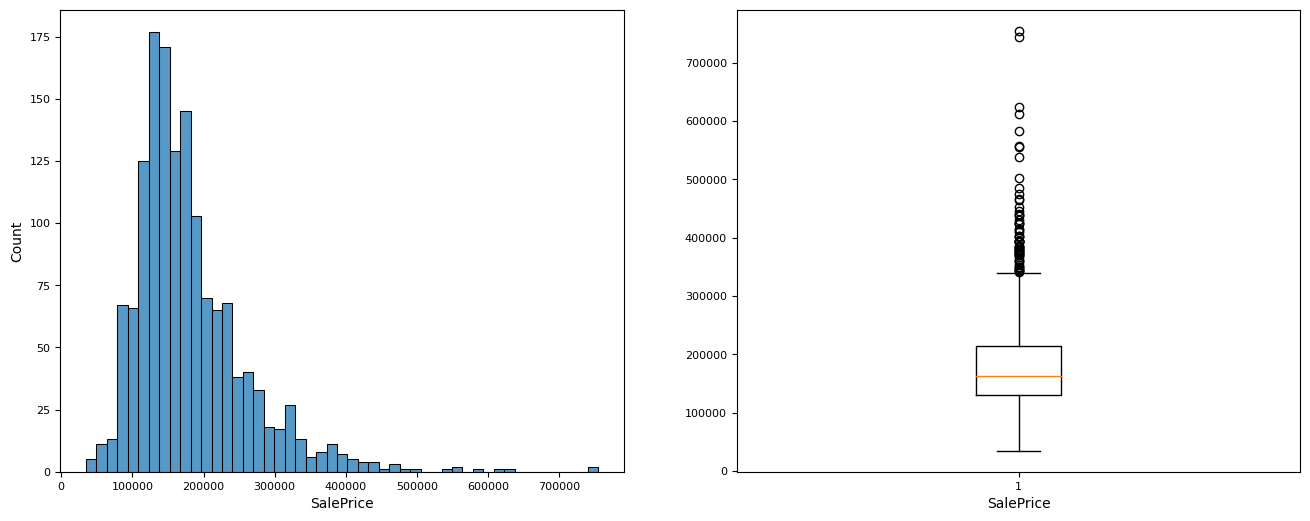




New Price distribution:


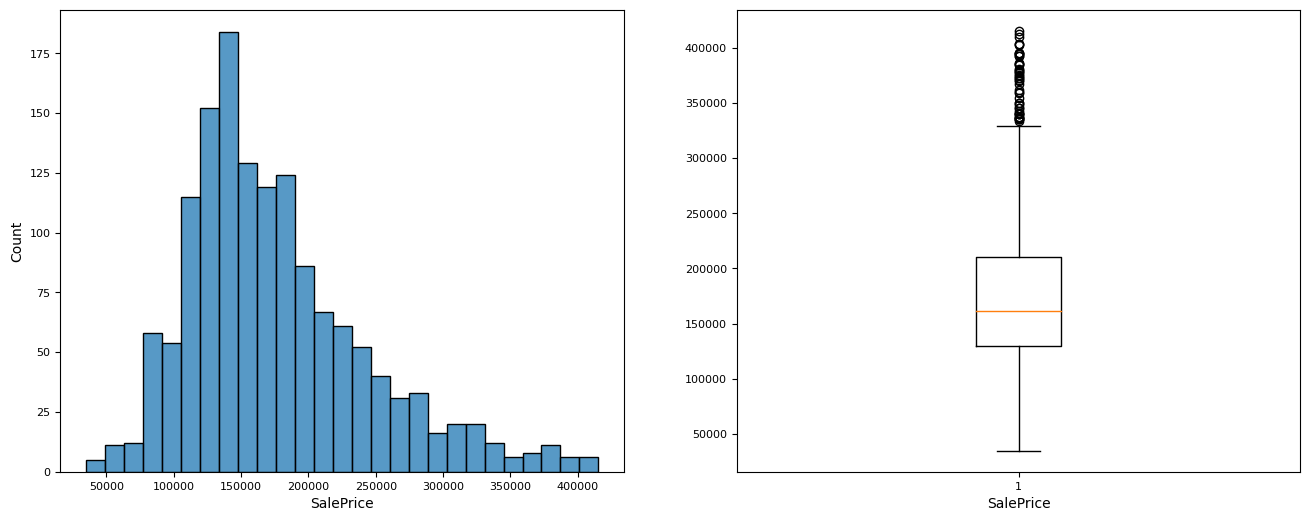

In [46]:
new_plotter = visualization(df_without_outlayers)

print('The old Price distribution:')
plotter.price_distribution()
plt.show()
print('\n\n\nNew Price distribution:')
new_plotter.price_distribution()

##### Result:
Considering visualizations we can not judge these houses are outlayers or not. Because they might be fancy houses with high prices. To investigate it, we can do ML and discuss if these are outlayers or not.

#### Pair-Plots
The discription of this plot can be found within the function.


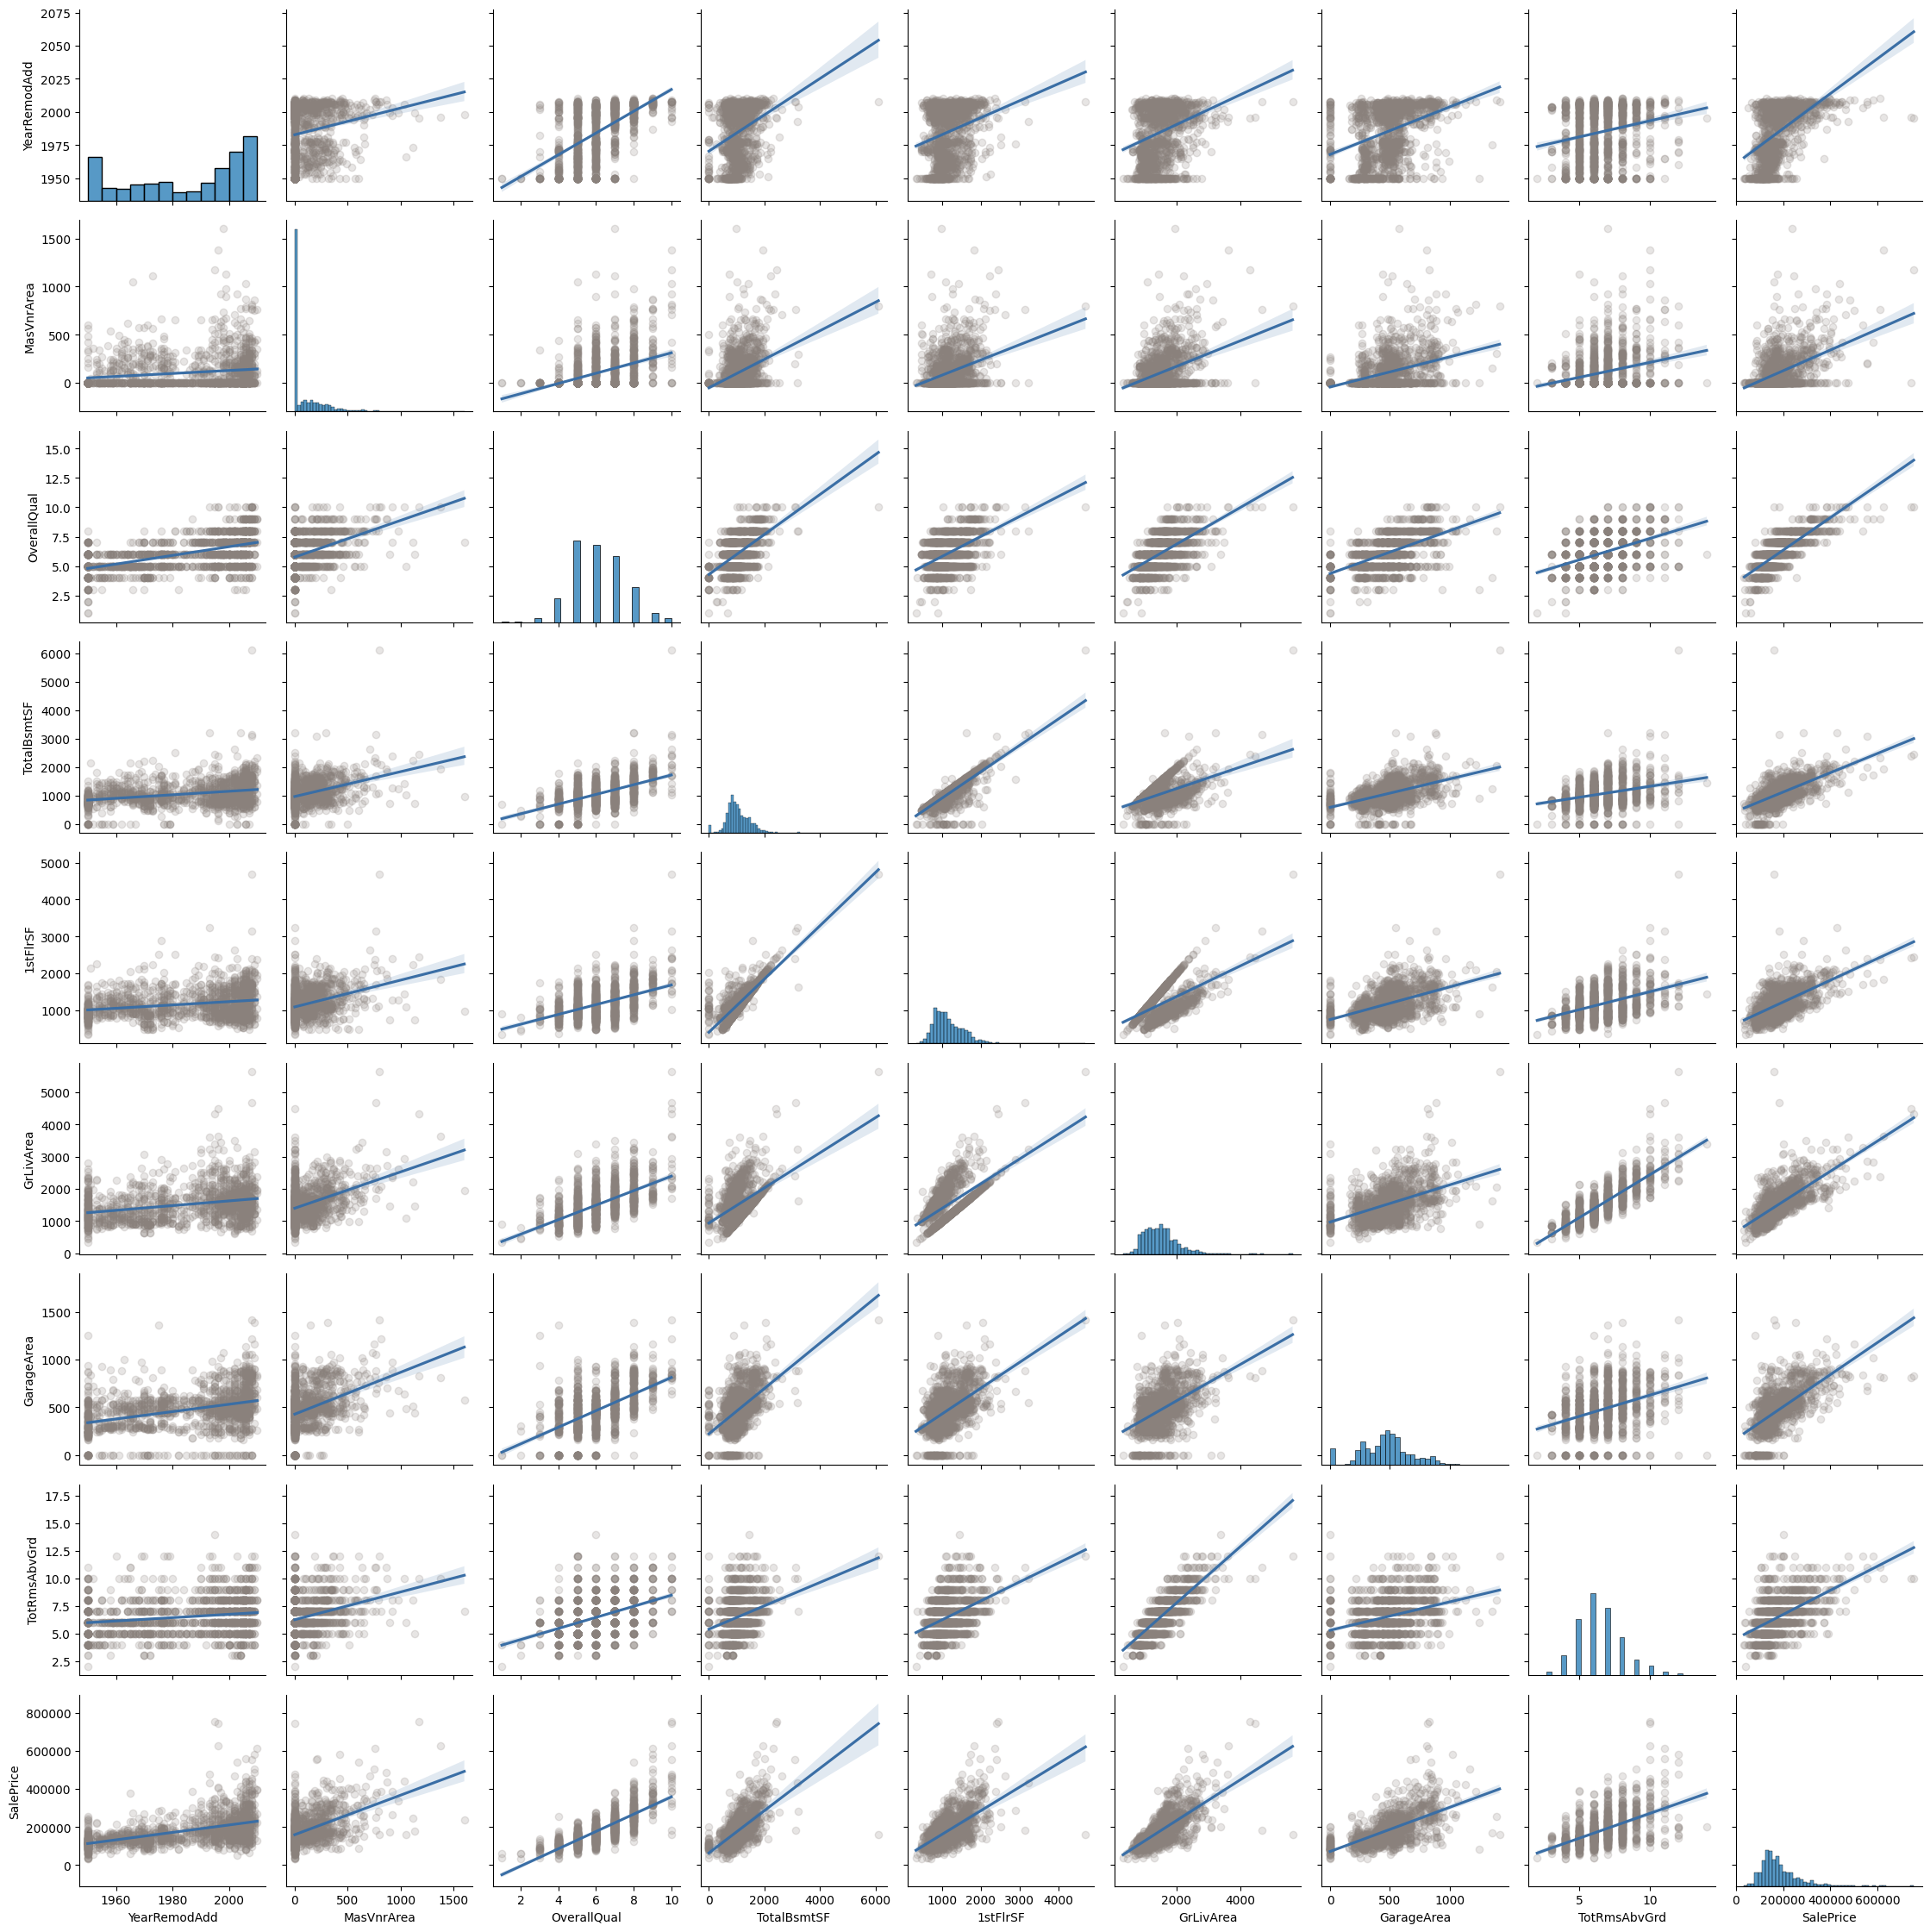

In [47]:
# Plotting the pairplots
plotter.pair_plots()

### Box-Cox Data Transformation

Regarding the distribution of feeatures in PairPlots graph, there are some non-categorical features which have normal distribution. However, all of them are skewed to the left. these features are 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'SalePrice', and 'MasVnrArea'. To removing this skewness in these  features we have to transform their distribution. Our options are Log-Transformation and Box-Cox Transformation. Although log transformation is a easy method to use in comparison with box-cox method, we choose box-cox as it completely solve this issue, while log can't.

The problem with this method is that box-cox  can be used just for positive data, whereas we have many zeroes in our dataset. So, we shift our data by adding an epsilon that is an extremely small number to all of our data, then we implement the box-cox transformation.

In [48]:
# Deploying Box-Cox transformation
transformed_df, skew_dataframe, lambda_dic = box_cox_transformer(df)

In [49]:
transformed_df.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,SalePrice
0,4.470077,2003.0,2003.0,4.695494,3.0,3.0,63.443149,5.235744,7.621712,2.0,3.0,8.0,1.000000e-09,2.0,33.850183,7.932606
1,3.829085,1976.0,1976.0,-34.333996,2.0,3.0,78.155763,5.460253,7.303623,2.0,2.0,6.0,1.000000e+00,2.0,31.183954,7.878259
2,4.470077,2001.0,2002.0,4.544780,3.0,3.0,65.954972,5.277966,7.667293,2.0,3.0,6.0,1.000000e+00,2.0,35.532111,7.959614
3,4.470077,1915.0,1970.0,-34.333996,2.0,2.0,59.331570,5.303382,7.625994,1.0,3.0,7.0,1.000000e+00,3.0,36.443966,7.774951
4,5.089582,2000.0,2000.0,5.146264,3.0,3.0,74.183155,5.404626,7.885039,2.0,3.0,9.0,1.000000e+00,3.0,41.190778,8.002870


In [50]:
lambda_dic

{'OverallQual': 0.7622455698532536,
 'TotalBsmtSF': 0.5230460974863727,
 '1stFlrSF': -0.07883214245105231,
 'GrLivArea': 0.006304877505247834,
 'GarageArea': 0.43788711651301193,
 'SalePrice': -0.07692401520136988,
 'MasVnrArea': -0.045219976590401896}

#### Result

The table belew, compares the original skewness of our data with the new skewness. Skewness = 0 is the ideal. Overall we can see almost all of the skewnesses have improvements. 

In [51]:
skew_dataframe

,Original Data Skew,Transformed Data Skew
OverallQual,0.216944,0.028409
TotalBsmtSF,1.524255,-1.098511
1stFlrSF,1.376757,-0.001098
GrLivArea,1.366560,0.000195
GarageArea,0.179981,-1.932475
SalePrice,1.882876,-0.008653
MasVnrArea,2.677616,0.389984


#### Comparing the distributions before and after transformation

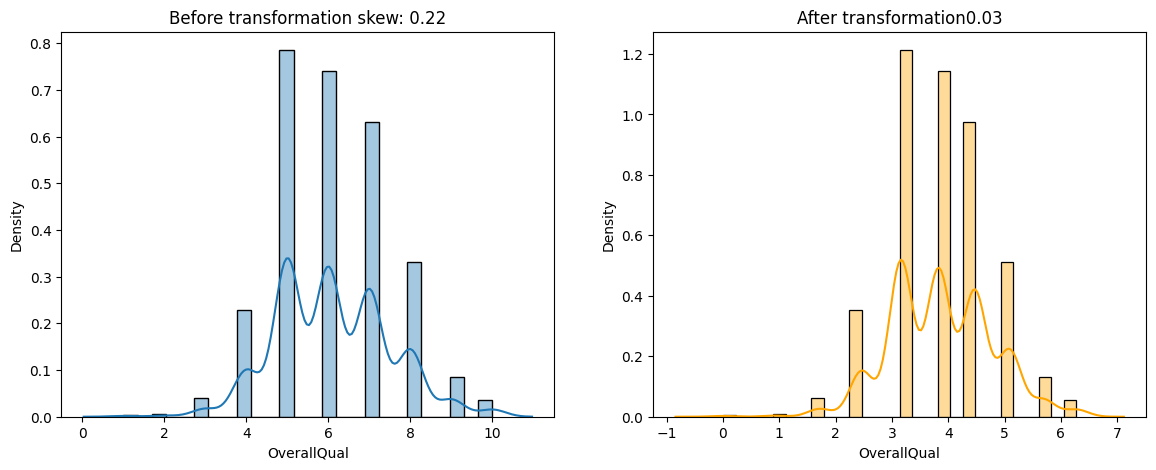

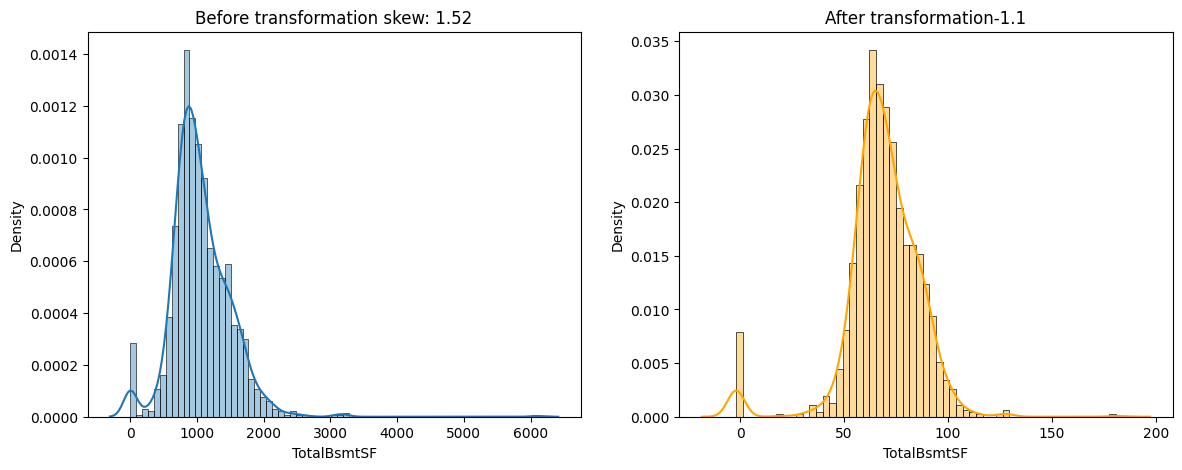

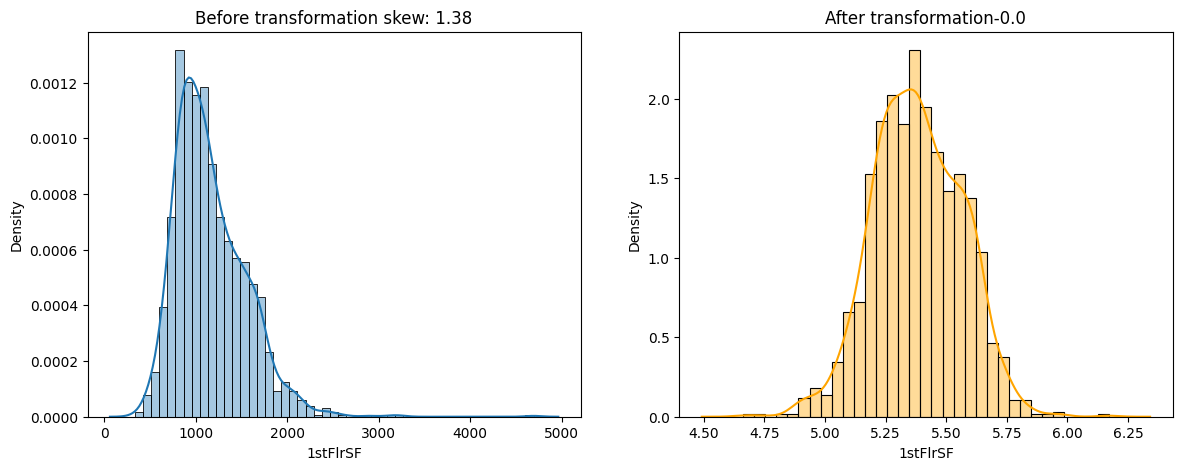

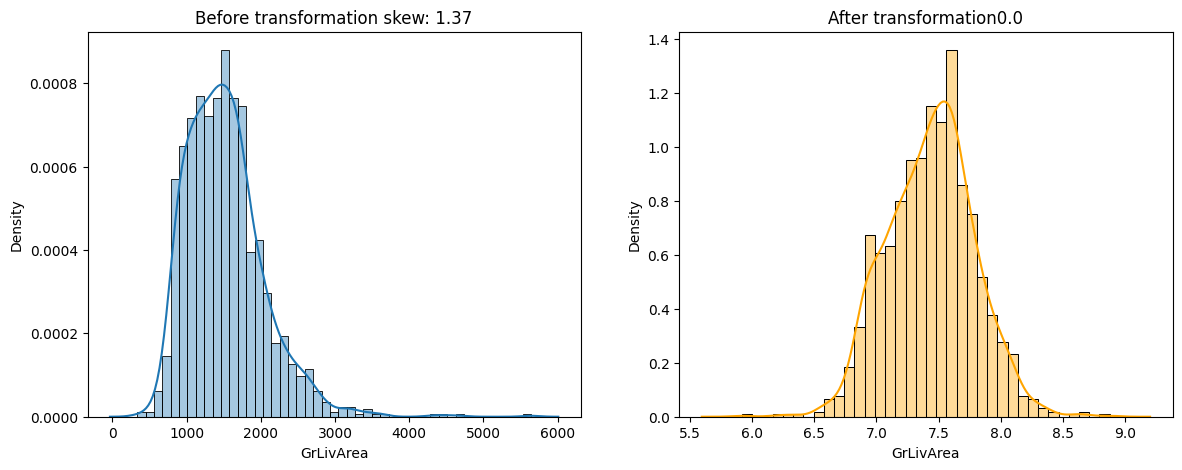

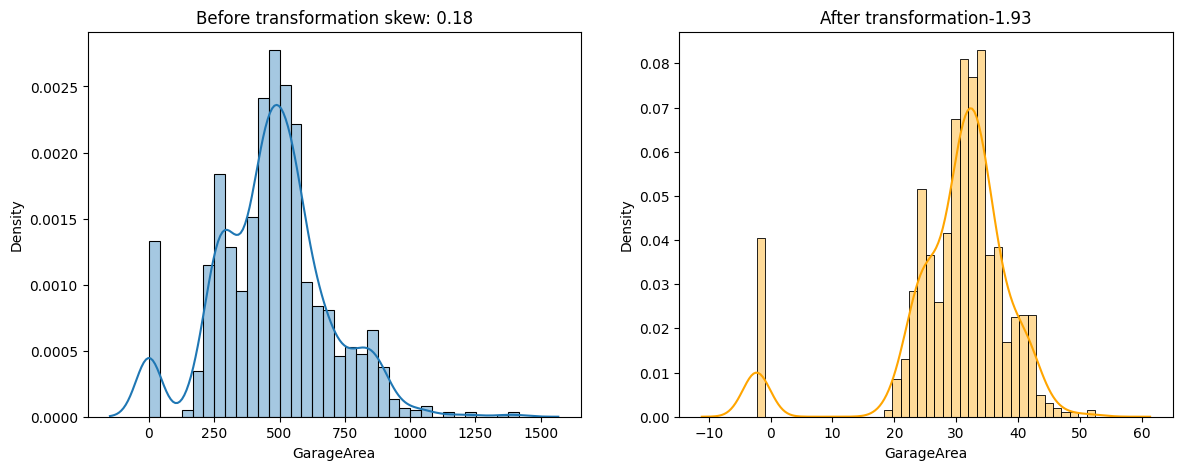

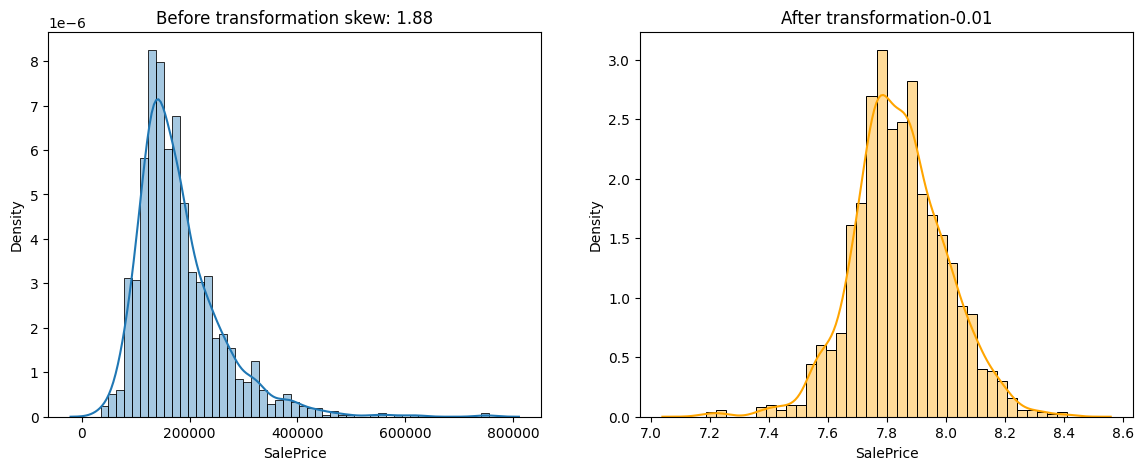

In [52]:
plotter.distribution_comparison(transformed_df, skew_dataframe)

# Machine Learning

In [54]:
# Creating an object for machine learning process
ml = machine_learning(df, transformed_df)

### Scikit-Learn Multivariate Liniear Regression model

In [55]:
# Scikit-Learn Multivariate Liniear Regression model
ml.multi_regr_with_scikit()

Normal model score is:  0.7642659946885764
Transformed model score is:  0.8388684160659758 




,coef,average,Effect on price
OverallQual,0.0391,6.099315,0.238483
YearBuilt,0.0006,1971.267808,1.182761
YearRemodAdd,0.0008,1984.865753,1.587893
MasVnrArea,-0.0001,103.117123,-0.010312
ExterQual,0.0025,2.395890,0.005990
BsmtQual,0.0135,2.514384,0.033944
TotalBsmtSF,0.0006,1057.429452,0.634458
1stFlrSF,0.0895,1162.626712,104.055091
GrLivArea,0.1298,1515.463699,196.707188
FullBath,-0.0041,1.565068,-0.006417


#### Reesult:

considering the score of the models, obviously the linear regression model performed better on the transformed dataset. the accuracy for the original dataset is %76.43  while after box-cox transformation our accuracy has been improved up to %83.89. Consequently, for deploying further improvements on our moodel, we can use transfored dataset rather than the original dataset.

Also, regarding "effect on price" index, we can see that the parameters which refer to the area of the house such as "GrLivArea" and "1stFlrSF" have the most impact on the price. And the second important variable group that has a significant effect on price is the date of construction and reconstruction. Features such as "YearBuilt" and "YearRemodAdd" have a moderate impact on price.

### Scikit-Learn Random Forest Ensemble learning method 

In [56]:
ml.multi_regr_with_randomforest()

Normal model score is:  0.8065805549434145
Transformed model score is:  0.81960352953889


### statsmodels library Multivariate linear model via least squares 

statmodels library offers more statistical metrics comparing with scikit-learn that are useful for model selection. We shortly describe these metrics here wnd how they help the process of feature selection.

#### BIC:
Bayesian Information Criterion (BIC) is a statistical criterion for model selection that balances the trade-off between model fit and complexity. It is calculated by adding a penalty term to the log-likelihood of the model, with the penalty term increasing as the number of parameters in the model increases. BIC is commonly used to select the best model among a set of competing models in various statistical and machine learning applications. The Smaller BIC the simpler model.

#### AIC : 
Akaike Information Criterion (AIC) is a statistical criterion for model selection that measures the quality of a model based on how well it fits the data and how many parameters it has. It is calculated by adding a penalty term to the log-likelihood of the model, where the penalty term is proportional to the number of parameters in the model. AIC is commonly used to select the best model among a set of competing models in various statistical and machine learning applications. The Smaller BIC the better model.

#### R-squared: 
R-squared is a statistical measure that represents the proportion of variation in a dependent variable that is explained by an independent variable or variables in a linear regression model. It ranges between 0 and 1, where 0 indicates that the model doesn't explain any variation, and 1 indicates a perfect fit between the model and the data. We can consider it as the accuracy of our model.

#### p-values:
P-values are a statistical measure used to determine the probability of observing a result as extreme or more extreme than the one obtained, assuming that the null hypothesis is true. The p-value is typically compared to a significance level (e.g., 0.05), and if it is less than the significance level, the null hypothesis is rejected. 

#### VIF:
Variance Inflation Factor (VIF) is a statistical measure used to detect the presence of multicollinearity in regression analysis. It measures how much the variance of the estimated regression coefficients is inflated due to multicollinearity among the independent variables. VIF values greater than 3 indicate the presence of multicollinearity, with higher values indicating more severe multicollinearity.



### Model Selection Approach:
Initially we are looking for the models with the higher r-squared. Models with bigger r-squared are better fitted on data points. Once we measure the r-squared of our model, we evaluate the p-values of our features. p-values higher than 0.05 inticates that the coeficient of our independant variables are significant. Therefore, we should drop features with p-values over 0.05. Once we've done it, we should check BIC and AIC factores, they can be a good measure to analyze is our new model simpler than our previouos model or not. If removing a column doesn't effect the r-squared that much, also reduce the BIC and AIC, we choose the new model as the best model. 


### Note:
In all the models below, we except a high multicollinearity dues to weak feature selection process, for instance the features such as YearBuilt and YearRemodAdd, or features which refer to the size of house such as TotalBsmtSF, 1stFlrSF, and GrLivArea have compelling multicollinearity effect on each other

In [57]:
ml.multi_regr_with_lstat()

BIC is:  -2866.5939459025276
AIC is:  -2946.5701001785374
r-squared for original dataframe is:  0.8036786061691842
r-squared for modified dataframe is:  0.8497640074088291


(                  coef  p-values  VIF Factor
 const         3.345330     0.000       0.000
 OverallQual   0.039077     0.000      73.749
 YearBuilt     0.000576     0.000    8885.052
 YearRemodAdd  0.000788     0.000    8740.769
 MasVnrArea   -0.000078     0.496       1.824
 ExterQual     0.002484     0.657      53.278
 BsmtQual      0.013489     0.002      28.861
 TotalBsmtSF   0.000555     0.004      32.237
 1stFlrSF      0.089462     0.000      45.348
 GrLivArea     0.129825     0.000      47.400
 FullBath     -0.004131     0.428      18.941
 KitchenQual   0.020311     0.000      37.191
 TotRmsAbvGrd  0.001034     0.630      56.702
 Fireplaces    0.022721     0.000       2.700
 GarageCars    0.016385     0.005      35.402
 GarageArea    0.000857     0.036      31.574,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              SalePrice   R-squared:                       0.847
 Model:

In [58]:
ml = machine_learning(df.drop('FullBath', axis=1), transformed_df.drop('FullBath', axis=1))
ml.multi_regr_with_lstat()

BIC is:  -2872.9555006839364
AIC is:  -2947.9331453176956
r-squared for original dataframe is:  0.8030503588376833
r-squared for modified dataframe is:  0.8495191462177774


(                  coef  p-values  VIF Factor
 const         3.422742     0.000       0.000
 OverallQual   0.038926     0.000      72.939
 YearBuilt     0.000556     0.000    8684.845
 YearRemodAdd  0.000778     0.000    8527.005
 MasVnrArea   -0.000076     0.505       1.819
 ExterQual     0.002363     0.673      52.942
 BsmtQual      0.013530     0.002      28.701
 TotalBsmtSF   0.000568     0.003      31.897
 1stFlrSF      0.089390     0.000      45.231
 GrLivArea     0.126694     0.000      44.279
 KitchenQual   0.020256     0.000      36.972
 TotRmsAbvGrd  0.000842     0.693      55.796
 Fireplaces    0.022991     0.000       2.654
 GarageCars    0.015911     0.006      34.881
 GarageArea    0.000899     0.026      31.202,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              SalePrice   R-squared:                       0.847
 Model:                            OLS   Adj. R-squar

In [59]:
ml = machine_learning(df.drop(['FullBath', 'ExterQual'], axis=1),
                      transformed_df.drop(['FullBath', 'ExterQual'], axis=1))
ml.multi_regr_with_lstat()

BIC is:  -2879.773330685338
AIC is:  -2949.7524656768464
r-squared for original dataframe is:  0.8004283611714987
r-squared for modified dataframe is:  0.8493866329058775


(                  coef  p-values  VIF Factor
 const         3.402262     0.000       0.000
 OverallQual   0.039393     0.000      65.447
 YearBuilt     0.000562     0.000    8635.902
 YearRemodAdd  0.000782     0.000    8494.169
 MasVnrArea   -0.000076     0.505       1.816
 BsmtQual      0.013636     0.002      28.324
 TotalBsmtSF   0.000569     0.003      31.876
 1stFlrSF      0.089556     0.000      45.228
 GrLivArea     0.126819     0.000      44.276
 KitchenQual   0.020940     0.000      30.838
 TotRmsAbvGrd  0.000828     0.698      55.757
 Fireplaces    0.022907     0.000       2.635
 GarageCars    0.015993     0.006      34.868
 GarageArea    0.000896     0.027      31.194,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              SalePrice   R-squared:                       0.847
 Model:                            OLS   Adj. R-squared:                  0.845
 Method:           

In [60]:
ml = machine_learning(df.drop(['FullBath', 'ExterQual', 'MasVnrArea'], axis=1),
                      transformed_df.drop(['FullBath', 'ExterQual', 'MasVnrArea'], axis=1))
ml.multi_regr_with_lstat()

BIC is:  -2886.320958727809
AIC is:  -2951.3015840770668
r-squared for original dataframe is:  0.795556012923421
r-squared for modified dataframe is:  0.8491895496551417


(                  coef  p-values  VIF Factor
 const         3.426023     0.000       0.000
 OverallQual   0.039127     0.000      64.746
 YearBuilt     0.000547     0.000    8474.927
 YearRemodAdd  0.000788     0.000    8302.511
 BsmtQual      0.013819     0.002      28.281
 TotalBsmtSF   0.000560     0.003      31.630
 1stFlrSF      0.089084     0.000      45.220
 GrLivArea     0.127023     0.000      43.409
 KitchenQual   0.020977     0.000      30.831
 TotRmsAbvGrd  0.000767     0.719      55.658
 Fireplaces    0.022781     0.000       2.635
 GarageCars    0.015712     0.007      34.867
 GarageArea    0.000904     0.025      31.090,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              SalePrice   R-squared:                       0.847
 Model:                            OLS   Adj. R-squared:                  0.845
 Method:                 Least Squares   F-statistic:            

In [61]:
ml = machine_learning(df.drop(['FullBath', 'ExterQual', 'MasVnrArea', 'TotRmsAbvGrd'], axis=1),
                      transformed_df.drop(['FullBath', 'ExterQual', 'MasVnrArea', 'TotRmsAbvGrd'], axis=1))
ml.multi_regr_with_lstat()

BIC is:  -2893.1883289724483
AIC is:  -2953.1704446794556
r-squared for original dataframe is:  0.7950242103826386
r-squared for modified dataframe is:  0.8491191136086412


(                  coef  p-values  VIF Factor
 const         3.416856     0.000       0.000
 OverallQual   0.039082     0.000      64.742
 YearBuilt     0.000545     0.000    8474.278
 YearRemodAdd  0.000786     0.000    8283.997
 BsmtQual      0.013758     0.002      28.193
 TotalBsmtSF   0.000560     0.003      31.581
 1stFlrSF      0.088880     0.000      45.206
 GrLivArea     0.130263     0.000      19.026
 KitchenQual   0.020994     0.000      30.772
 Fireplaces    0.022677     0.000       2.621
 GarageCars    0.015965     0.005      34.603
 GarageArea    0.000884     0.027      30.891,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              SalePrice   R-squared:                       0.847
 Model:                            OLS   Adj. R-squared:                  0.845
 Method:                 Least Squares   F-statistic:                     544.2
 Date:                Sat, 06 M

In [62]:
ml = machine_learning(df.drop(['FullBath', 'ExterQual', 'MasVnrArea', 'TotRmsAbvGrd', 'GarageArea'], axis=1),
                      transformed_df.drop(['FullBath', 'ExterQual', 'MasVnrArea', 'TotRmsAbvGrd', 'GarageArea'], axis=1))
ml.multi_regr_with_lstat()

BIC is:  -2895.254309765134
AIC is:  -2950.237915829891
r-squared for original dataframe is:  0.7939248952801108
r-squared for modified dataframe is:  0.8473809468842513


(                  coef  p-values  VIF Factor
 const         3.463554     0.000       0.000
 OverallQual   0.039197     0.000      64.740
 YearBuilt     0.000555     0.000    8471.827
 YearRemodAdd  0.000758     0.000    8280.054
 BsmtQual      0.012511     0.004      27.995
 TotalBsmtSF   0.000597     0.002      31.188
 1stFlrSF      0.089159     0.000      45.029
 GrLivArea     0.129350     0.000      18.955
 KitchenQual   0.021469     0.000      30.663
 Fireplaces    0.022786     0.000       2.598
 GarageCars    0.026169     0.000      11.482,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              SalePrice   R-squared:                       0.846
 Model:                            OLS   Adj. R-squared:                  0.845
 Method:                 Least Squares   F-statistic:                     596.0
 Date:                Sat, 06 May 2023   Prob (F-statistic):               0.

#### Result:

Among All the bove regressor models, The statsmodel linear regression model outperform, and also among all the statsmodel models, the least model is the best model considering the lowest BIC and AIC, also the significance of the coeficients regarding to p-values. However, with respect to the weak feature engineering of the dataset, we can see variance inflation factor for the features is too high which illustrate there is a massive multicollinearity amongst the features. all in all, the best regression model hereis the statsmodel with 11 feature that are: 

OverallQual, YearBuilt, YearRemodAdd, MasVnrArea, BsmtQual, TotalBsmtSF, 1stFlrSF, GrLivArea, KitchenQua, Fireplaces, and GarageCars


### Comparing Model with and without outlayers:

In [63]:
transformed_df_without_outlayers, skew_dataframe_without_outlayers, lambda_dic_without_outlayers = box_cox_transformer(df_without_outlayers)
transformed_df, skew_dataframe, lambda_dic = box_cox_transformer(df)

In [64]:
comparison = machine_learning(transformed_df.drop(['FullBath', 'ExterQual', 'MasVnrArea', 'TotRmsAbvGrd', 'GarageArea'], axis=1),
                      transformed_df_without_outlayers.drop(['FullBath', 'ExterQual', 'MasVnrArea', 'TotRmsAbvGrd', 'GarageArea'], axis=1))
comparison.multi_regr_with_lstat()

BIC is:  1652.8173140450403
AIC is:  1598.005823778882
r-squared for original dataframe is:  0.8473809468842513
r-squared for modified dataframe is:  0.8390410060048632


(                   coef  p-values  VIF Factor
 const        -10.754153     0.000       0.000
 OverallQual    0.272156     0.000      59.512
 YearBuilt      0.005139     0.000    8516.907
 YearRemodAdd   0.006190     0.000    9419.520
 BsmtQual       0.092301     0.011      33.595
 TotalBsmtSF    0.005993     0.000      51.408
 1stFlrSF       0.496347     0.000    2319.841
 GrLivArea      0.624196     0.000     930.614
 KitchenQual    0.194016     0.000      30.442
 Fireplaces     0.252747     0.000       2.636
 GarageCars     0.196880     0.000      11.444,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              SalePrice   R-squared:                       0.853
 Model:                            OLS   Adj. R-squared:                  0.852
 Method:                 Least Squares   F-statistic:                     618.6
 Date:                Sat, 06 May 2023   Prob (F-statistic):     

### Result:
As can be seen, removing outlayers deacreases the accuracy of the model which means possibly they are not outlayers. Also removing them increases the AIC and BIC significantly which means it add up to complexity of the model that is not a good result. All in all, Obviously the 22 houses which we used to consider as outlayer are not real outlayers. They are just houses with price above the average such as fancy houses.

# Note:
Due to the macbooks' M series chipsets' architecture, installing TensorFlow on macbook is tricky. We don't provide any instruction for that in this project.
ANN regressor only works properly if you install TensorFlow on your virtual environment, otherwise it won't. Nonetheless, if you want to run ANN regression, you can use the link below to run this notebook on the Kaggle platform. This notebook is public and you can access it with your account.

Link:
https://www.kaggle.com/vahidsharifi76/house-price-python-uog

## ANN Regressor

In [65]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [66]:
features, target = feature_target_splitter(transformed_df)

In [67]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=2200)

In [68]:
# normalizing the data
s_scaler = StandardScaler()
x_train = s_scaler.fit_transform(x_train)
x_test = s_scaler.transform(x_test)

In [69]:
i = Input(shape=(15, ))
x = Dense(90,activation='relu')(i)
x = Dropout(0.2)(x)
x = Dense(45,activation='relu')(x)
x = Dense(15,activation='relu')(x)
x = Dense(5,activation='relu')(x)
x = Dense(30,activation='relu')(x)
x = Dense(90,activation='relu')(x)
x = Dense(45,activation='relu')(x)
x = Dense(14,activation='relu')(x)
x = Dense(1)(x)

model = Model(i,x)

In [70]:
results = []
for i in [1, 5, 10]:
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.001/i))
    r =model.fit(x=x_train,y=y_train,
              validation_data=(x_test,y_test),
              batch_size=256,
              epochs=200)
    results.append(r.history['loss'])
    
model.summary()

Epoch 1/200
5/5 [==============================] - 1s 57ms/step - loss: 61.2627 - val_loss: 59.9970
Epoch 2/200
5/5 [==============================] - 0s 10ms/step - loss: 58.3598 - val_loss: 55.6625
Epoch 3/200
5/5 [==============================] - 0s 11ms/step - loss: 52.4328 - val_loss: 46.7008
Epoch 4/200
5/5 [==============================] - 0s 10ms/step - loss: 41.0678 - val_loss: 31.1483
Epoch 5/200
5/5 [==============================] - 0s 9ms/step - loss: 23.5902 - val_loss: 11.2383
Epoch 6/200
5/5 [==============================] - 0s 10ms/step - loss: 7.9898 - val_loss: 7.6896
Epoch 7/200
5/5 [==============================] - 0s 10ms/step - loss: 11.4204 - val_loss: 6.3549
Epoch 8/200
5/5 [==============================] - 0s 15ms/step - loss: 5.7233 - val_loss: 4.1766
Epoch 9/200
5/5 [==============================] - 0s 10ms/step - loss: 5.1391 - val_loss: 5.0518
Epoch 10/200
5/5 [==============================] - 0s 10ms/step - loss: 5.1079 - val_loss: 3.5874
Epoch 11/

In [71]:
y_pred = model.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

10/10 [==============================] - 0s 2ms/step
MAE: 0.04323374840943305
MSE: 0.0038056033449608514
RMSE: 0.06168957241674521
VarScore: 0.8500695661576034


In [72]:
flatten_result = [i for j in results for i in j]

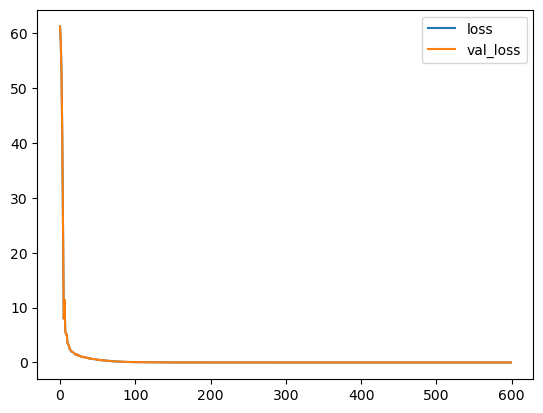

In [73]:
plt.plot(flatten_result, label='loss')
plt.plot(flatten_result, label='val_loss')
plt.legend();

### Result:
Considering the results of ANN regression, it can be seen we had an slight improvement in accuracy of the model. It is good to mention, here we used explained variance score which is almost equivalent to r-squared, however, technically there is some differences between these metrics, but here we can use them interchangably. Although there was an small improvement of the result comparing to statsmodel multivariate regression, the ANN regression is resouorce consuming instead, so basically, in my opinion, statsmodel is the winner for this case.